In [1]:
from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.052453815412358384
Avg Annual Return (Ari): 0.08502752128566983
Volatility (Std): 0.25607932514898973
Sharpe Ratio: 0.20483424572382086
Downside Volatility: 0.18380565810675878
Sortino Ratio: 0.2853765001178143
VaR 99: -0.04221290802025903
VaR 99 (Year): -0.4779677337926634
CVaR 99: -0.06390772924618005
CVaR 99 (Year): -0.4779677337926634
Initial Value: 2568.300048828125
Peak Value: 33154.12109375
Final Value: 16879.900390625
Max Drawdown: 0.6518186042408531
Avg Drawdown: 0.2540892144602104
Calmar Ratio: 0.08047302588647225
Sterling Ratio: 0.20643857522166686
Monthly Stats: 
           mean        std    median        q1        q3        max        min
Month                                                                         
1      0.108838   7.381218  0.708198 -5.570009  5.691372  13.529388 -14.893693
2      1.563425   6.013340  1.250924 -1.857724  6.485447  11.481628 -11.978626
3     -0

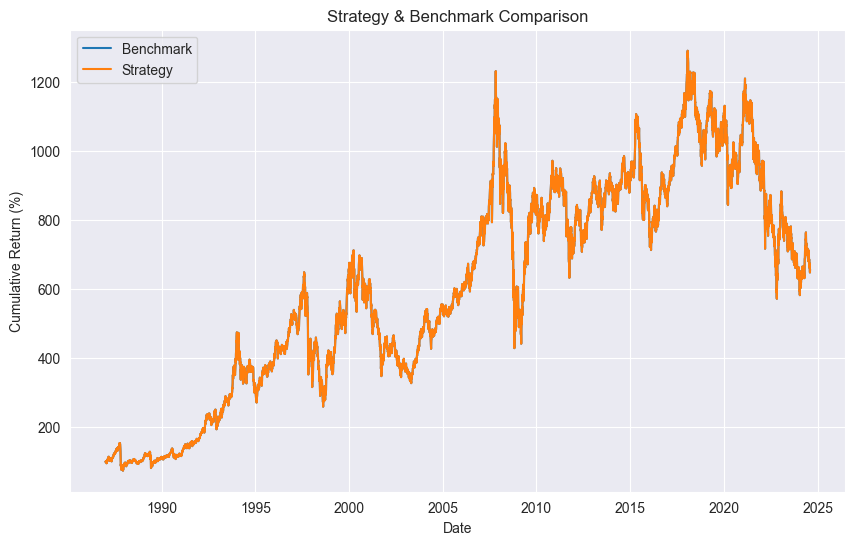

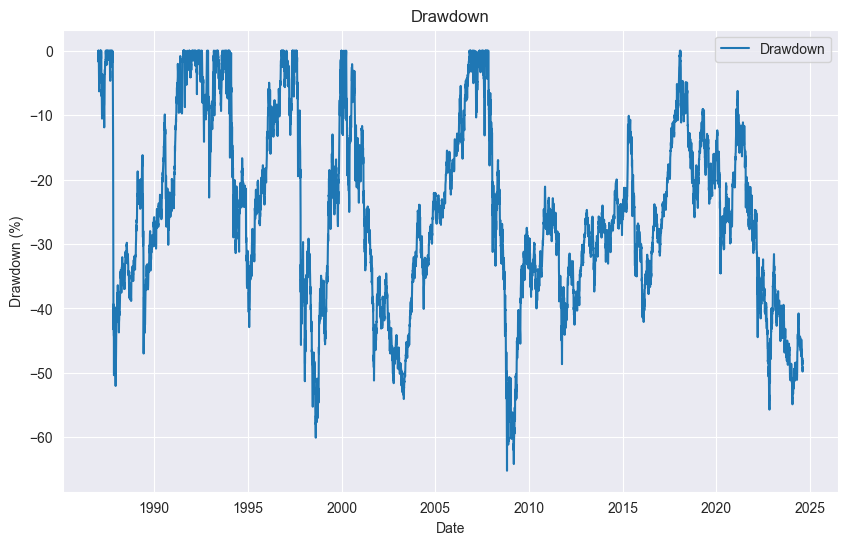

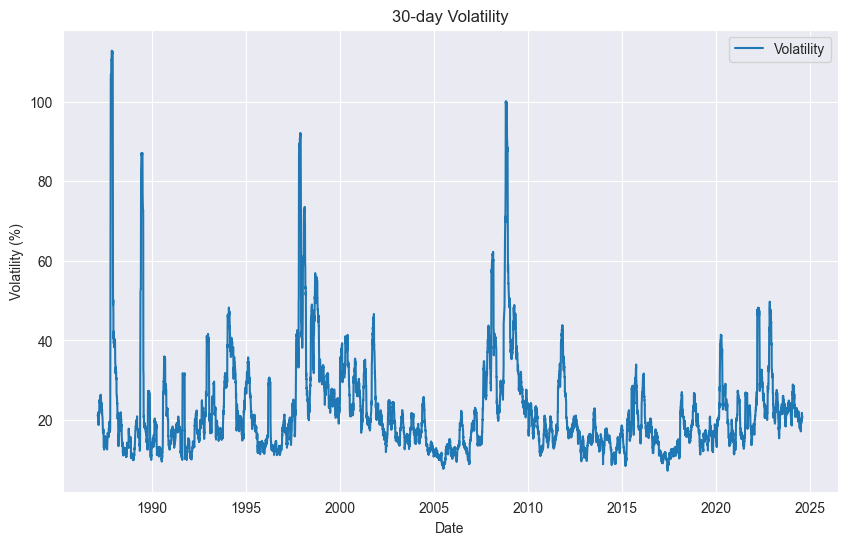

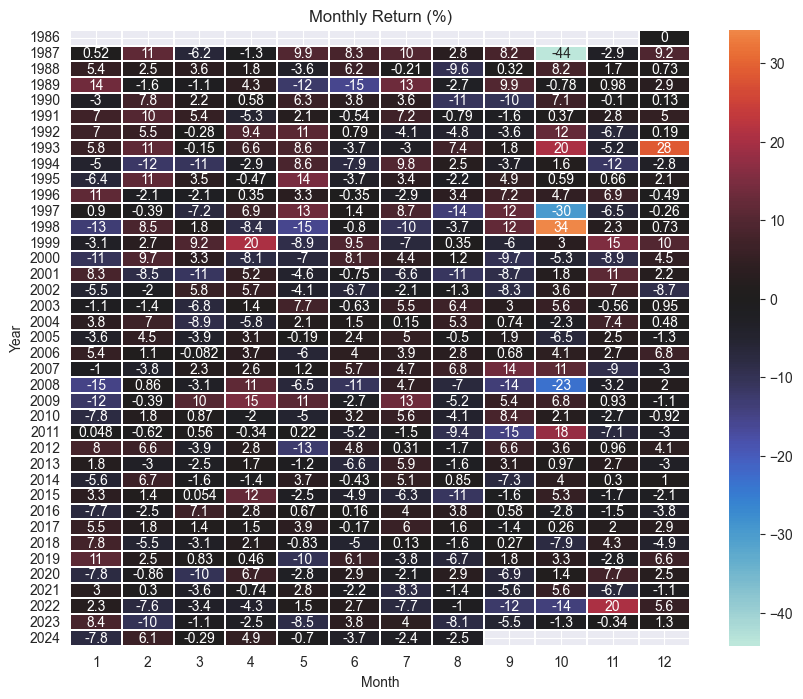

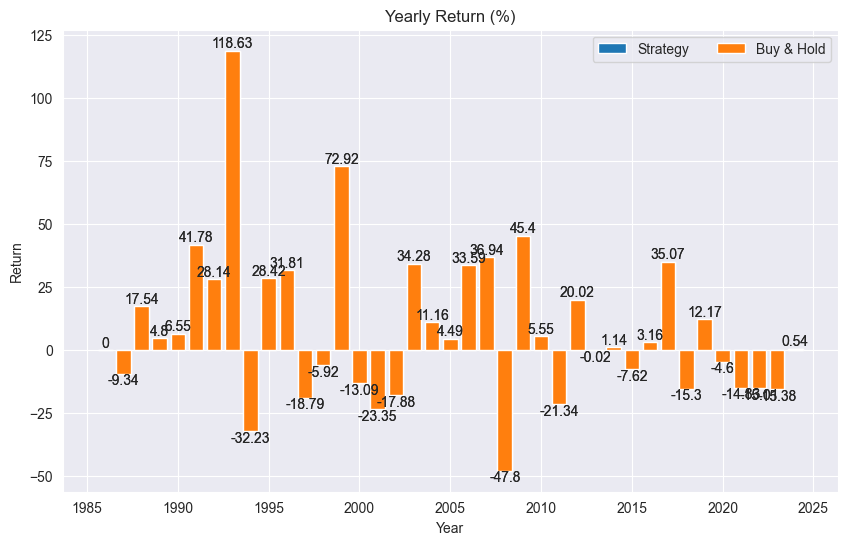

In [2]:
start_date = '1960-01-01'
hsi = yf.download('^HSI', start=start_date)

hsi_df = pd.DataFrame()
hsi_df['Price'] = hsi['Adj Close']
hsi_df['Value'] = hsi['Adj Close']
hsi_df['Return'] = hsi['Adj Close'].pct_change()

test_hsi = Backtest(hsi_df)

Monthly Analysis

In [3]:
monthly_df = pd.DataFrame(test_hsi.results['Monthly Return'].copy())

# ---- return ----
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

f = {'Monthly Return': ['mean', 'std', 'median', q1, q3, 'max', 'min']}
monthly_stats = monthly_df.groupby(monthly_df.index.month).agg(f)
monthly_stats.index.name = 'Month'
monthly_stats.columns = ['mean', 'std', 'median', 'q1', 'q3', 'max', 'min']
monthly_stats = monthly_stats * 100
monthly_stats

,mean,std,median,q1,q3,max,min
Month,,,,,,,
1,0.108838,7.381218,0.708198,-5.570009,5.691372,13.529388,-14.893693
2,1.563425,6.013340,1.250924,-1.857724,6.485447,11.481628,-11.978626
3,-0.879580,5.154553,-0.285075,-3.575542,2.075457,10.217688,-11.141069
4,2.354639,5.988174,1.730765,-1.186273,5.109608,20.412027,-8.363668
5,-0.020078,7.435194,0.010806,-4.928106,3.851170,14.361784,-15.421900
6,-0.192971,5.399910,-0.262341,-3.713004,3.635697,9.451809,-15.468405
7,1.583916,6.002740,3.517338,-2.786778,5.438338,13.224416,-10.488869
8,-1.964835,5.444782,-1.477780,-5.097114,2.293343,7.407884,-13.700303
9,-0.499892,7.438486,0.316441,-5.987439,4.890989,13.547392,-14.539091


In [4]:
# with pd.ExcelWriter('HSI_monthly.xlsx') as writer:  
#     monthly_stats.to_excel(writer, sheet_name='monthly_stats')

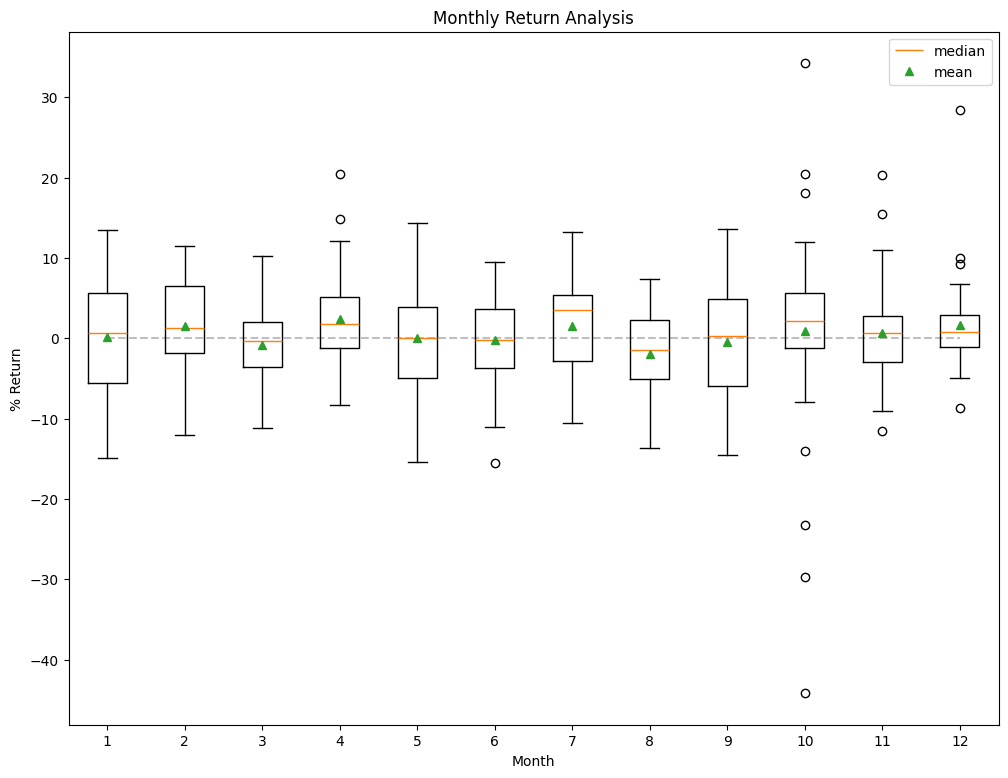

In [10]:
dfs = [_df for _df in monthly_df['Monthly Return'].groupby(monthly_df.index.month)]
array_of_df = []

vals, names, xs = [],[],[]

for _df in dfs:
    new_df: pd.Series = _df[1] * 100
    new_df.name = str(_df[0])
    vals.append(new_df.values.tolist())
    names.append(new_df.name)
    xs.append([int(new_df.name) for i in range(len(new_df.index))])

all_mean = monthly_df['Monthly Return'].mean()

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot([i + 1 for i in range(12)], [all_mean for i in range(12)], alpha=0.5
         , linestyle='--', color='grey', label='overall mean return')
bp = plt.boxplot(vals, showmeans=True, tick_labels=names)
# for x, val in zip(xs, vals):
#     plt.scatter(x, val, alpha=0.2)

plt.style.use('default')
plt.title('Monthly Return Analysis')
plt.xlabel('Month')
plt.ylabel('% Return')
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.grid(False)
# plt.savefig('hsi_monthly_return.png')
plt.show()